In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\Hyunjin Kang\\Documents\\Kelly Kang'

In [3]:
credit=pd.read_csv('creditcard.csv')

In [4]:
credit.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

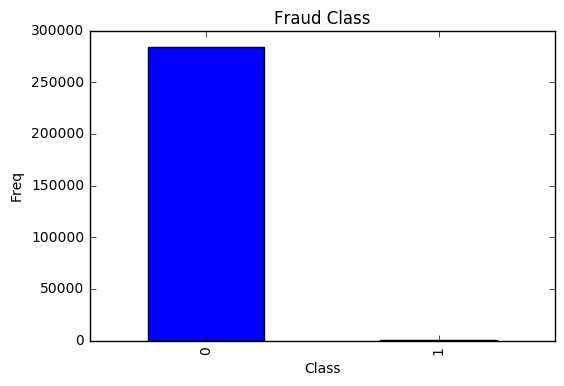

In [5]:
credit['Class'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Freq')
plt.title('Fraud Class')

In [6]:
credit['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler=StandardScaler()
scaler.fit(credit['Amount'])
credit['scaled']=scaler.transform(credit['Amount'])
credit.drop('Amount',1,inplace=True)

C:\Users\Hyunjin Kang\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Hyunjin Kang\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


### 1) Down-sample minority class

In [9]:
from sklearn.utils import resample

In [10]:
fr_credit=credit[credit['Class']==1]
nfr_credit=credit[credit['Class']==0]
fr_credit.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758


In [12]:
from sklearn.utils import resample
from sklearn.cross_validation import train_test_split

In [15]:
nfr_resam=resample(nfr_credit,replace=True,n_samples=len(fr_credit))

In [16]:
print(nfr_resam.shape)
print(fr_credit.shape)
# 50% and 50%

(492, 31)
(492, 31)


In [17]:
credit_resam=pd.concat([nfr_resam,fr_credit])

In [18]:
X_resam=credit_resam.drop('Class',1)
y_resam=credit_resam['Class']
X=credit.drop('Class',1)
y=credit['Class']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)
Xresem_train,Xresem_test,yresem_train,yresem_test=train_test_split(X_resam,y_resam,test_size=0.33)

### 2) Logistic Regression

In [19]:
from sklearn.cross_validation import train_test_split,cross_val_score,KFold,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score

In [20]:
lr=LogisticRegression()
lr.fit(Xresem_train,yresem_train)
y_pred=lr.predict(Xresem_test)

In [21]:
print(f1_score(y_pred,yresem_test))
# Weighted average of precision & recall

0.919093851133


In [22]:
print(confusion_matrix(y_pred,yresem_test))
print(classification_report(y_pred,yresem_test))



[[158  23]
 [  2 142]]
             precision    recall  f1-score   support

          0       0.99      0.87      0.93       181
          1       0.86      0.99      0.92       144

avg / total       0.93      0.92      0.92       325



In [72]:
c_params=[0.001,0.01,0.1,1,100]
cross_val=[]
for i in c_params:
        lr=LogisticRegression(C=i,penalty='l1')
        b=cross_val_score(lr,Xresem_train,yresem_train,cv=20,n_jobs=1)
        print(i,np.average(b))
        cross_val.append(np.average(b))

0.001 0.761809269162
0.01 0.920975378788
0.1 0.939304812834
1 0.949919229055
100 0.942705548128


In [73]:
a=[]
for j in range(3,12):
    lr=LogisticRegression(C=0.01,penalty='l1')
    cross_val=KFold(len(Xresem_train),n_folds=j,shuffle=True,random_state=101)
    b=cross_val_score(lr,Xresem_train,yresem_train,cv=cross_val,n_jobs=1)
    a.append(np.average(b))
    print(j,np.average(b))

3 0.918050366681
4 0.918043237251
5 0.918043025677
6 0.921045315541
7 0.9211006239
8 0.92108066412
9 0.921099181373
10 0.921095571096
11 0.921083718541


In [75]:
lr=LogisticRegression(C=0.01,penalty='l1')
cross_val=KFold(len(Xresem_train),n_folds=7,shuffle=True,random_state=101)
np.mean(cross_val_score(lr,Xresem_train,yresem_train,cv=cross_val,n_jobs=1))

0.92110062390017589

In [80]:
from sklearn.metrics import roc_auc_score,auc
from sklearn import metrics

In [81]:
lr=LogisticRegression(C=0.01,penalty='l1')
prob_y=lr.fit(Xresem_train,yresem_train).predict_proba(Xresem_test)

In [82]:
prob=prob_y[:,1]

In [83]:
print(roc_auc_score(yresem_test,prob))

0.937121212121


In [84]:
fpr,tpr,threshold=metrics.roc_curve(yresem_test,prob)
roc_auc=auc(fpr,tpr)

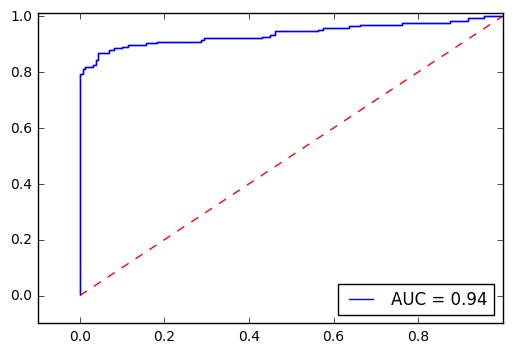

In [85]:
plt.plot(fpr,tpr,'b')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')

### 3) Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
yrf_pred=rf.predict(X_test)

In [69]:
print(f1_score(yrf_pred,y_test))

0.881720430108


In [156]:
yrf_prob=rf.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,yrf_prob))


0.913123027516


In [157]:
fpr,tpr,threshold=metrics.roc_curve(y_test,yrf_prob)
roc_auc=auc(fpr,tpr)

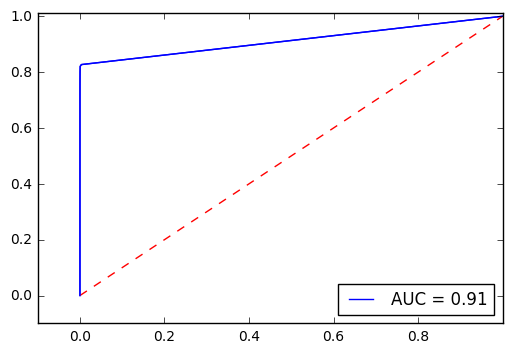

In [158]:
plt.plot(fpr,tpr,'b')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')

## Oversampling -SMOTE

In [159]:
from imblearn.over_sampling import SMOTE

In [160]:
smote=SMOTE(kind='regular')
X_sm,y_sm=smote.fit_sample(X,y)

In [178]:
Xsm_train,Xsm_test,ysm_train,ysm_test=train_test_split(X_sm,y_sm,test_size=0.33)

In [180]:
lr.fit(Xsm_train,ysm_train)
ysm_pred=lr.predict(Xsm_test)

In [182]:
print(confusion_matrix(ysm_test,ysm_pred))

[[92434  1161]
 [ 6578 87475]]


In [191]:
print(f1_score(ysm_test,ysm_pred))

0.957638390927
